In [19]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# package for gmm
from sklearn.mixture import GaussianMixture as GMM

%matplotlib inline
import matplotlib.pyplot as plt

# サンプルデータの作成

Text(0, 0.5, '')

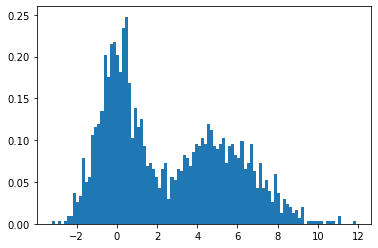

In [120]:
# ガウス分布からサンプルデータを作成
x1 = np.random.normal(0, 1, 1000)  # 平均0，標準偏差1
x2 = np.random.normal(5, 2, 1000)  # 平均5，標準偏差2
x = np.concatenate((x1, x2))  # 混合分布の作成

# 混合分布の描画
plt.hist(x, density=True, bins=100);
plt.ylabel('')

# GMM によるクラスタリング

In [124]:
gmm = GMM(n_components=2, max_iter=100000, random_state=1234) # インスタンスを生成
gmm.fit(x.reshape(-1,1)) # sklearnの入力形状合わせて入力・学習

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100000,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=1234, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

## クラスタリング結果の確認

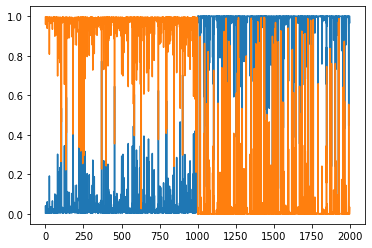

In [126]:
predict = gmm.predict_proba(x.reshape(-1,1))
plt.plot(predict)

In [ ]:
## 確率密度関数の導出

[0.53996212 0.46003788]
[[0.14484828]
 [5.1927466 ]]
[[[1.11171457]]

 [[1.88819908]]]


Text(0, 0.5, 'Probability Density')

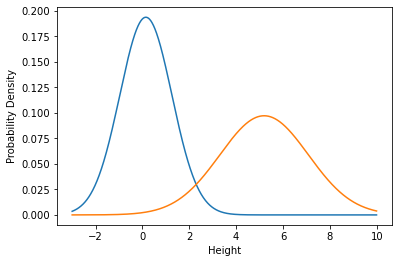

In [117]:
weight = gmm.weights_ #重み（足すと1になる）
mean = gmm.means_ #平均
sd = np.sqrt(gmm.covariances_) #標準偏差
print(weight)
print(mean)
print(sd)
from scipy.stats import norm

x_ = np.arange(-3, 10, 0.01)
y1 = weight[0] * norm.pdf(x_, mean[0], sd[0])
y2 = weight[1] * norm.pdf(x_,mean[1], sd[1])

plt.plot(x_, y1.flatten())
plt.plot(x_, y2.flatten())
plt.xlabel("Height")
plt.ylabel("Probability Density")

## 確率密度関数の重ね合わせ

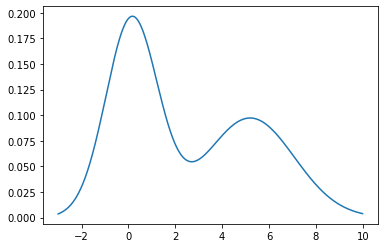

In [118]:
y = y1 + y2
plt.plot(x_, y.flatten())